# ML Assignment Group: 119

## Problem Statement:

Data were collected on 81 patients undergoing corrective spinal surgery (Bell et al., 1989). The objective was to determine important risk factors for kyphosis following surgery. The risk factors are age in years, the starting vertebrae level of the surgery, and the number of levels involved.



For the dataset, implement the Random Forest classifier using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement Random Forest Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul>

### Contributors
J Manoj Balaji (2019AB04228@wilp.bits-pilani.ac.in) <br>
Siddharth Verma (2019AD04097@wilp.bits-pilani.ac.in) <br>
Randeep Singh (2019AD04069@wilp.bits-pilani.ac.in) <br>



In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#### Age Distribution is from 1 to 206, we are assuming it is in months.

In [6]:
rfc = RandomForestClassifier(n_estimators=10)

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [9]:
X_train, X_test

(    Age  Number  Start
 50   68       5     10
 36    1       3      9
 42  143       9      3
 76  157       3     13
 45  139       3     10
 ..  ...     ...    ...
 33  112       3     16
 55   72       5     15
 69   15       5     16
 20   22       2     16
 9    59       6     12
 
 [64 rows x 3 columns],
     Age  Number  Start
 49  177       2     14
 61  114       7      8
 10   82       5     14
 28    4       3     16
 80   36       4     13
 68   18       4     11
 8   113       2     16
 66  195       2     17
 54  140       4     15
 34  140       5     11
 26    8       3      6
 17  175       5     13
 23  131       2      3
 29  151       2     16
 13    1       4     12
 2   128       4      5
 60  130       4      1)

In [10]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
num_of_trees = list(range(10,500,10))
train_results = []
test_results = []
for n in num_of_trees:
   model = RandomForestClassifier(n_estimators=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_accuracy = accuracy_score(y_train, train_pred)
   train_results.append(train_accuracy)
   y_pred = model.predict(X_test)
   test_accuracy = accuracy_score(y_test, y_pred)
   test_results.append(test_accuracy)

line1, = plt.plot(num_of_trees, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(num_of_trees, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [10]:
rfc_pred = rfc.predict(X_test)

In [11]:
train_pred = rfc.predict(X_train)

In [12]:
print("Training Accuracy: ",accuracy_score(y_train,train_pred))
print("Test Accuracy: ",accuracy_score(y_test,rfc_pred))

Training Accuracy:  1.0
Test Accuracy:  0.7647058823529411


In [13]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[12  1]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.80      0.92      0.86        13
     present       0.50      0.25      0.33         4

    accuracy                           0.76        17
   macro avg       0.65      0.59      0.60        17
weighted avg       0.73      0.76      0.73        17



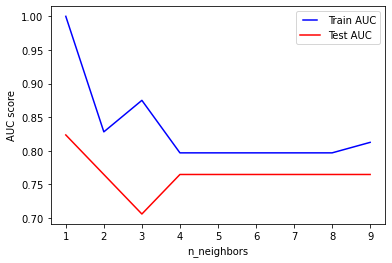

In [14]:
neighbors = list(range(1,10))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_accuracy = accuracy_score(y_train, train_pred)
   
   train_results.append(train_accuracy)
   y_pred = model.predict(X_test)
   test_accuracy = accuracy_score(y_test, y_pred)
  
   test_results.append(test_accuracy)
line1, = plt.plot(neighbors, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(neighbors, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

train_pred = knn.predict(X_train)


In [16]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7647058823529411


In [17]:
print("Training Accuracy: ",accuracy_score(y_train,train_pred))
print("Test Accuracy: ",accuracy_score(y_test,y_pred))

Training Accuracy:  0.796875
Test Accuracy:  0.7647058823529411
